In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
connex = sqlite3.connect("../weather_predict.db")  # Opens file if exists, else creates file
cur = connex.cursor()

In [3]:
query_city1 = 'kyoto_train_feats'
query1 = "SELECT * FROM " + query_city1

query_city2 = 'salvador_train_feats'
query2 = "SELECT * FROM " + query_city2

query_city3 = 'kauai_train_feats'
query3 = "SELECT * FROM " + query_city3

query_city4 = 'nice_train_feats'
query4 = "SELECT * FROM " + query_city4

query_city5 = 'manly_train_feats'
query5 = "SELECT * FROM " + query_city5

In [4]:
df1 = pd.read_sql(query1, con=connex).set_index('Date')
df2 = pd.read_sql(query2, con=connex).set_index('Date')
df3 = pd.read_sql(query3, con=connex).set_index('Date')
df4 = pd.read_sql(query4, con=connex).set_index('Date')
df5 = pd.read_sql(query5, con=connex).set_index('Date')

In [5]:
frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames)
df.head()

,Avg_temp,Avg_dwp,Temp_max,Max_dwp,Temp_min,Min_dwp,Avg_temp_1,Avg_temp_2,Avg_temp_3,Avg_dwp_1,...,Temp_max_3,Max_dwp_1,Max_dwp_2,Max_dwp_3,Temp_min_1,Temp_min_2,Temp_min_3,Min_dwp_1,Min_dwp_2,Min_dwp_3
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,6.980000,0.438333,14.0,4.00,0.20,-4.40,6.304167,6.253750,5.609583,0.795833,...,13.0,5.00,6.60,9.40,-1.56,-0.06,-2.67,-3.31,-2.46,-5.27
2017-01-05,6.185000,-3.490000,10.0,-1.28,2.08,-5.40,6.980000,6.304167,6.253750,0.438333,...,12.0,4.00,5.00,6.60,0.20,-1.56,-0.06,-4.40,-3.31,-2.46
2017-01-06,3.526667,-3.940000,10.0,1.00,-5.17,-7.17,6.185000,6.980000,6.304167,-3.490000,...,14.0,-1.28,4.00,5.00,2.08,0.20,-1.56,-5.40,-4.40,-3.31
2017-01-07,5.455417,-1.427917,10.0,6.40,0.16,-4.60,3.526667,6.185000,6.980000,-3.940000,...,14.0,1.00,-1.28,4.00,-5.17,2.08,0.20,-7.17,-5.40,-4.40
2017-01-08,5.946250,3.912917,8.0,8.00,2.67,0.00,5.455417,3.526667,6.185000,-1.427917,...,10.0,6.40,1.00,-1.28,0.16,-5.17,2.08,-4.60,-7.17,-5.40


In [6]:
df.corr()[['Avg_temp']].sort_values('Avg_temp')  

,Avg_temp
Max_dwp_3,0.855245
Max_dwp_2,0.861792
Temp_max_3,0.873308
Max_dwp_1,0.877088
Temp_max_2,0.882392
Min_dwp_3,0.889329
Min_dwp_2,0.897346
Max_dwp,0.900894
Temp_max_1,0.903728
Min_dwp_1,0.912694


In [7]:
df.columns

Index(['Avg_temp', 'Avg_dwp', 'Temp_max', 'Max_dwp', 'Temp_min', 'Min_dwp',
       'Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Avg_dwp_1', 'Avg_dwp_2',
       'Avg_dwp_3', 'Temp_max_1', 'Temp_max_2', 'Temp_max_3', 'Max_dwp_1',
       'Max_dwp_2', 'Max_dwp_3', 'Temp_min_1', 'Temp_min_2', 'Temp_min_3',
       'Min_dwp_1', 'Min_dwp_2', 'Min_dwp_3'],
      dtype='object')

In [8]:
# remove features that have very low Correlation values
# also remove max and min temperatures since we already 
# have the mean temperatures
predictors = ['Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3',
              'Temp_max_1','Temp_max_2', 'Temp_max_3',
              'Temp_min_1', 'Temp_min_2', 'Temp_min_3',
              'Avg_dwp_1', 'Avg_dwp_2', 'Avg_dwp_3', 
              'Max_dwp_1', 'Max_dwp_2','Max_dwp_3', 
              'Min_dwp_1', 'Min_dwp_2', 'Min_dwp_3']
              
X = df[predictors]
y = df['Avg_temp']

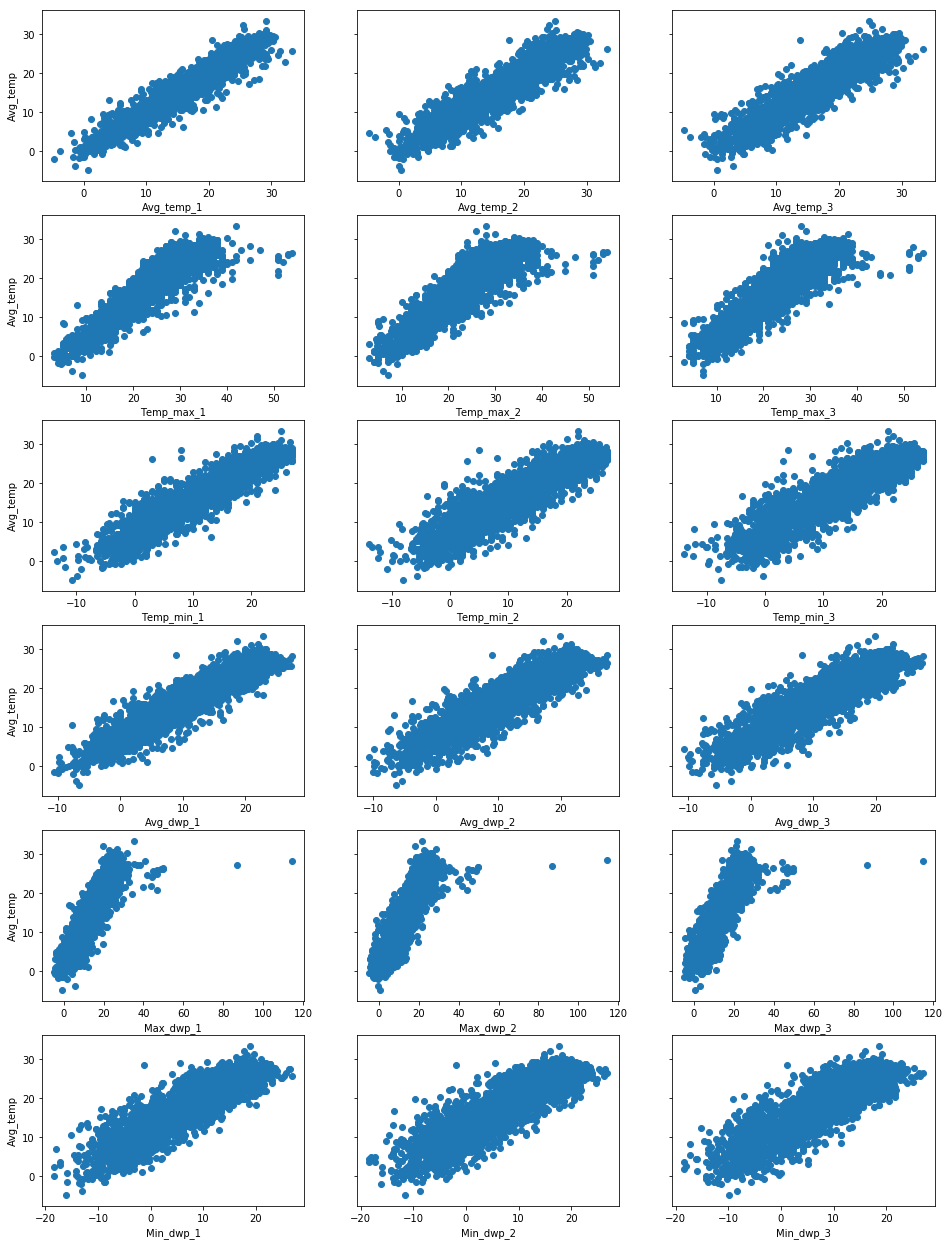

In [9]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df[feature], df['Avg_temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Avg_temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

In [10]:
# a p-value helps you determine the significance of your results
# what the data are telling you about the Average Temperature 
# (p-value < 0.05 strong evidence)

import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df[predictors]
y = df['Avg_temp']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

,const,Avg_temp_1,Avg_temp_2,Avg_temp_3,Temp_max_1
Date,,,,,
2017-01-04,1.0,6.304167,6.253750,5.609583,14.0
2017-01-05,1.0,6.980000,6.304167,6.253750,14.0
2017-01-06,1.0,6.185000,6.980000,6.304167,10.0
2017-01-07,1.0,3.526667,6.185000,6.980000,10.0
2017-01-08,1.0,5.455417,3.526667,6.185000,10.0


In [11]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3814.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6851.1
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3600   BIC:                         1.386e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7237      0.156      4.635      0.000       0.418       1.030
Avg_temp_1     0.9970      0.039     25.756      0.000       0.921       1.073
Avg_temp_2    -0.0598      0.043     -1.390      0.165      -0.144       0.025
Avg_temp_3     0.2000      0.040      4.975      0.000       0.121       0.279
Temp_max_1    -0.0757      0.018     -4.257      0.000      -0.111      -0.041
Temp_max_2     0.0213      0.018      1.177      0.239      -0.014       0.057
Temp_max_3    -0.0264      0.018     -1.493      0.135      -0.061       0.008
Temp_min_1    -0.2359      0.021    -11.265      0.000      -0.277      -0.195
Temp_min_2    -0.0054      0.022     -0.248      0.804      -0.048       0.038
Temp_min_3     0.0557      0.022      2.585      0.010       0.013       0.098
Avg_dwp_1      0.0349      0.029      1.196      0.232      -0.022       0.092
Avg_dwp_2     -0.0786      0.031     -2.513      0.012      -0.140      -0.017
Avg_dwp_3      0.0540      0.029      1.860      0.063      -0.003       0.111
Max_dwp_1     -0.0016      0.011     -0.139      0.889      -0.023       0.020
Max_dwp_2      0.0132      0.011      1.173      0.241      -0.009       0.035
Max_dwp_3      0.0079      0.011      0.709      0.479      -0.014       0.030
Min_dwp_1      0.1347      0.018      7.319      0.000       0.099       0.171
Min_dwp_2     -0.0040      0.019     -0.205      0.838      -0.042       0.034
Min_dwp_3     -0.0471      0.018     -2.557      0.011      -0.083      -0.011
==============================================================================
Omnibus:                      371.444   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2222.678
Skew:                          -0.291   Prob(JB):                         0.00
Kurtosis:                       6.795   Cond. No.                         477.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = X.drop('Max_dwp_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4039.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6851.1
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3601   BIC:                         1.385e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7225      0.156      4.636      0.000       0.417       1.028
Avg_temp_1     0.9984      0.037     26.788      0.000       0.925       1.072
Avg_temp_2    -0.0601      0.043     -1.400      0.162      -0.144       0.024
Avg_temp_3     0.1998      0.040      4.974      0.000       0.121       0.279
Temp_max_1    -0.0768      0.016     -4.791      0.000      -0.108      -0.045
Temp_max_2     0.0215      0.018      1.191      0.234      -0.014       0.057
Temp_max_3    -0.0263      0.018     -1.489      0.137      -0.061       0.008
Temp_min_1    -0.2361      0.021    -11.311      0.000      -0.277      -0.195
Temp_min_2    -0.0055      0.022     -0.251      0.802      -0.049       0.037
Temp_min_3     0.0557      0.022      2.586      0.010       0.013       0.098
Avg_dwp_1      0.0327      0.024      1.336      0.182      -0.015       0.081
Avg_dwp_2     -0.0783      0.031     -2.510      0.012      -0.139      -0.017
Avg_dwp_3      0.0542      0.029      1.869      0.062      -0.003       0.111
Max_dwp_2      0.0131      0.011      1.165      0.244      -0.009       0.035
Max_dwp_3      0.0079      0.011      0.702      0.483      -0.014       0.030
Min_dwp_1      0.1353      0.018      7.583      0.000       0.100       0.170
Min_dwp_2     -0.0040      0.019     -0.207      0.836      -0.042       0.034
Min_dwp_3     -0.0472      0.018     -2.565      0.010      -0.083      -0.011
==============================================================================
Omnibus:                      371.471   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2221.192
Skew:                          -0.291   Prob(JB):                         0.00
Kurtosis:                       6.793   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = X.drop('Min_dwp_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4293.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6851.1
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3602   BIC:                         1.384e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7236      0.156      4.646      0.000       0.418       1.029
Avg_temp_1     0.9980      0.037     26.827      0.000       0.925       1.071
Avg_temp_2    -0.0581      0.042     -1.389      0.165      -0.140       0.024
Avg_temp_3     0.1995      0.040      4.970      0.000       0.121       0.278
Temp_max_1    -0.0769      0.016     -4.801      0.000      -0.108      -0.045
Temp_max_2     0.0212      0.018      1.178      0.239      -0.014       0.057
Temp_max_3    -0.0261      0.018     -1.482      0.138      -0.061       0.008
Temp_min_1    -0.2358      0.021    -11.340      0.000      -0.277      -0.195
Temp_min_2    -0.0072      0.020     -0.355      0.722      -0.047       0.033
Temp_min_3     0.0561      0.021      2.609      0.009       0.014       0.098
Avg_dwp_1      0.0337      0.024      1.404      0.161      -0.013       0.081
Avg_dwp_2     -0.0823      0.024     -3.374      0.001      -0.130      -0.034
Avg_dwp_3      0.0554      0.028      1.945      0.052      -0.000       0.111
Max_dwp_2      0.0136      0.011      1.246      0.213      -0.008       0.035
Max_dwp_3      0.0077      0.011      0.692      0.489      -0.014       0.030
Min_dwp_1      0.1340      0.017      8.000      0.000       0.101       0.167
Min_dwp_3     -0.0485      0.017     -2.805      0.005      -0.082      -0.015
==============================================================================
Omnibus:                      371.223   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2219.879
Skew:                          -0.291   Prob(JB):                         0.00
Kurtosis:                       6.793   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X = X.drop('Temp_min_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4580.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6851.2
No. Observations:                3619   AIC:                         1.373e+04
Df Residuals:                    3603   BIC:                         1.383e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7272      0.155      4.680      0.000       0.423       1.032
Avg_temp_1     1.0005      0.037     27.405      0.000       0.929       1.072
Avg_temp_2    -0.0673      0.033     -2.060      0.039      -0.131      -0.003
Avg_temp_3     0.2014      0.040      5.066      0.000       0.123       0.279
Temp_max_1    -0.0769      0.016     -4.807      0.000      -0.108      -0.046
Temp_max_2     0.0237      0.017      1.428      0.153      -0.009       0.056
Temp_max_3    -0.0266      0.018     -1.514      0.130      -0.061       0.008
Temp_min_1    -0.2375      0.020    -11.742      0.000      -0.277      -0.198
Temp_min_3     0.0543      0.021      2.598      0.009       0.013       0.095
Avg_dwp_1      0.0341      0.024      1.421      0.155      -0.013       0.081
Avg_dwp_2     -0.0841      0.024     -3.521      0.000      -0.131      -0.037
Avg_dwp_3      0.0562      0.028      1.983      0.047       0.001       0.112
Max_dwp_2      0.0137      0.011      1.252      0.211      -0.008       0.035
Max_dwp_3      0.0077      0.011      0.687      0.492      -0.014       0.030
Min_dwp_1      0.1337      0.017      7.993      0.000       0.101       0.167
Min_dwp_3     -0.0488      0.017     -2.824      0.005      -0.083      -0.015
==============================================================================
Omnibus:                      371.736   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2229.196
Skew:                          -0.291   Prob(JB):                         0.00
Kurtosis:                       6.801   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = X.drop('Max_dwp_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4908.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6851.4
No. Observations:                3619   AIC:                         1.373e+04
Df Residuals:                    3604   BIC:                         1.383e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7330      0.155      4.725      0.000       0.429       1.037
Avg_temp_1     1.0010      0.036     27.428      0.000       0.929       1.073
Avg_temp_2    -0.0654      0.033     -2.009      0.045      -0.129      -0.002
Avg_temp_3     0.1943      0.038      5.062      0.000       0.119       0.270
Temp_max_1    -0.0772      0.016     -4.824      0.000      -0.109      -0.046
Temp_max_2     0.0227      0.017      1.371      0.171      -0.010       0.055
Temp_max_3    -0.0214      0.016     -1.349      0.177      -0.052       0.010
Temp_min_1    -0.2374      0.020    -11.740      0.000      -0.277      -0.198
Temp_min_3     0.0555      0.021      2.662      0.008       0.015       0.096
Avg_dwp_1      0.0338      0.024      1.410      0.158      -0.013       0.081
Avg_dwp_2     -0.0861      0.024     -3.636      0.000      -0.133      -0.040
Avg_dwp_3      0.0672      0.023      2.869      0.004       0.021       0.113
Max_dwp_2      0.0145      0.011      1.337      0.181      -0.007       0.036
Min_dwp_1      0.1341      0.017      8.019      0.000       0.101       0.167
Min_dwp_3     -0.0516      0.017     -3.074      0.002      -0.084      -0.019
==============================================================================
Omnibus:                      373.057   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.729
Skew:                          -0.292   Prob(JB):                         0.00
Kurtosis:                       6.810   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = X.drop('Max_dwp_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     5284.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6852.3
No. Observations:                3619   AIC:                         1.373e+04
Df Residuals:                    3605   BIC:                         1.382e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7465      0.155      4.821      0.000       0.443       1.050
Avg_temp_1     1.0030      0.036     27.500      0.000       0.931       1.074
Avg_temp_2    -0.0775      0.031     -2.479      0.013      -0.139      -0.016
Avg_temp_3     0.1959      0.038      5.104      0.000       0.121       0.271
Temp_max_1    -0.0782      0.016     -4.892      0.000      -0.110      -0.047
Temp_max_2     0.0329      0.015      2.248      0.025       0.004       0.062
Temp_max_3    -0.0222      0.016     -1.399      0.162      -0.053       0.009
Temp_min_1    -0.2368      0.020    -11.711      0.000      -0.276      -0.197
Temp_min_3     0.0566      0.021      2.722      0.007       0.016       0.097
Avg_dwp_1      0.0325      0.024      1.358      0.174      -0.014       0.079
Avg_dwp_2     -0.0697      0.020     -3.441      0.001      -0.109      -0.030
Avg_dwp_3      0.0675      0.023      2.882      0.004       0.022       0.113
Min_dwp_1      0.1329      0.017      7.959      0.000       0.100       0.166
Min_dwp_3     -0.0535      0.017     -3.201      0.001      -0.086      -0.021
==============================================================================
Omnibus:                      373.555   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2246.693
Skew:                          -0.293   Prob(JB):                         0.00
Kurtosis:                       6.815   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = X.drop('Avg_dwp_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     5723.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:47   Log-Likelihood:                -6853.2
No. Observations:                3619   AIC:                         1.373e+04
Df Residuals:                    3606   BIC:                         1.381e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7378      0.155      4.768      0.000       0.434       1.041
Avg_temp_1     1.0181      0.035     29.313      0.000       0.950       1.086
Avg_temp_2    -0.0838      0.031     -2.708      0.007      -0.144      -0.023
Avg_temp_3     0.1966      0.038      5.122      0.000       0.121       0.272
Temp_max_1    -0.0783      0.016     -4.895      0.000      -0.110      -0.047
Temp_max_2     0.0338      0.015      2.312      0.021       0.005       0.063
Temp_max_3    -0.0228      0.016     -1.441      0.150      -0.054       0.008
Temp_min_1    -0.2379      0.020    -11.778      0.000      -0.278      -0.198
Temp_min_3     0.0550      0.021      2.646      0.008       0.014       0.096
Avg_dwp_2     -0.0592      0.019     -3.162      0.002      -0.096      -0.022
Avg_dwp_3      0.0721      0.023      3.109      0.002       0.027       0.118
Min_dwp_1      0.1481      0.012     11.946      0.000       0.124       0.172
Min_dwp_3     -0.0587      0.016     -3.602      0.000      -0.091      -0.027
==============================================================================
Omnibus:                      371.153   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2232.592
Skew:                          -0.288   Prob(JB):                         0.00
Kurtosis:                       6.805   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = X.drop('Temp_max_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     6241.
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:10:48   Log-Likelihood:                -6854.3
No. Observations:                3619   AIC:                         1.373e+04
Df Residuals:                    3607   BIC:                         1.381e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7249      0.154      4.692      0.000       0.422       1.028
Avg_temp_1     1.0268      0.034     30.020      0.000       0.960       1.094
Avg_temp_2    -0.0743      0.030     -2.458      0.014      -0.134      -0.015
Avg_temp_3     0.1562      0.026      5.961      0.000       0.105       0.208
Temp_max_1    -0.0829      0.016     -5.292      0.000      -0.114      -0.052
Temp_max_2     0.0286      0.014      2.017      0.044       0.001       0.056
Temp_min_1    -0.2415      0.020    -12.043      0.000      -0.281      -0.202
Temp_min_3     0.0681      0.019      3.642      0.000       0.031       0.105
Avg_dwp_2     -0.0606      0.019     -3.242      0.001      -0.097      -0.024
Avg_dwp_3      0.0723      0.023      3.120      0.002       0.027       0.118
Min_dwp_1      0.1482      0.012     11.954      0.000       0.124       0.173
Min_dwp_3     -0.0580      0.016     -3.564      0.000      -0.090      -0.026
==============================================================================
Omnibus:                      372.422   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2249.811
Skew:                          -0.288   Prob(JB):                         0.00
Kurtosis:                       6.819   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_clean = X.drop('const', axis=1)
X_clean.columns

Index(['Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Temp_max_1', 'Temp_max_2',
       'Temp_min_1', 'Temp_min_3', 'Avg_dwp_2', 'Avg_dwp_3', 'Min_dwp_1',
       'Min_dwp_3'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_clean)

In [21]:
from sklearn.externals import joblib
scaler_filename = "final_scaler.save"
joblib.dump(X_scaler, scaler_filename)

['final_scaler.save']

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_scaled = X_scaler.transform(X_clean)


In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
# define the model
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(X_scaled, y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [25]:
y_ridge_prediction = ridge.predict(X_scaled)

In [26]:
ridge_mse = mean_squared_error(y, y_ridge_prediction)
ridge_mse

2.980880426686647

In [27]:
# use evaluation metrics to determine model performance
r2_ridge = r2_score(y, y_ridge_prediction)
print("The R^2 score for test data is:", r2_ridge)

The R^2 score for test data is: 0.9424609306864121


In [28]:
# save model
import pickle
with open('ridge_final_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

In [29]:
from sklearn.linear_model import LinearRegression
# define the model
linear = LinearRegression()

# traub the model/ fit the model to the traingin data
linear.fit(X_scaled, y)

# predict
y_linear_prediction = linear.predict(X_scaled)

In [30]:
# use evaluation metrics to determine model performance
r2_linear = r2_score(y, y_linear_prediction)

print("The R^2 score for test data is:", r2_linear)

The R^2 score for test data is: 0.9500854244172612


In [31]:
linear_mse = mean_squared_error(y, y_linear_prediction)
linear_mse

2.58588439361185

In [32]:
#save model
import pickle
with open('linear_final_model.pkl', 'wb') as file:
    pickle.dump(linear, file)

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtm = DecisionTreeRegressor(criterion="mae",
                            max_depth=8,
                            max_leaf_nodes=100, 
                            min_samples_leaf=40, 
                            min_samples_split= 40)

dtm.fit(X_scaled, y)
dtm_prediction = dtm.predict(X_scaled)

In [35]:
r2_dtm = r2_score(y, dtm_prediction)

print("The R^2 score for test data is:", r2_dtm)

The R^2 score for test data is: 0.9482444901960488


In [36]:
dtm_mse = mean_squared_error(y,dtm_prediction)
dtm_mse

2.6812561966718214

In [37]:
#save model
import pickle
with open('dtm_final_model.pkl', 'wb') as file:
    pickle.dump(dtm, file)